Face Edge Detection on Canny and Sobel

In [90]:

import matplotlib.pyplot as plt

In [91]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [92]:
#mount google drive to colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [93]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [94]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [95]:
def take_photo(filename='photo.jpg',filename2 = 'photo1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

 # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:

      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  
 
  # save image
  cv2.imwrite(filename, img)
  
  return filename

<IPython.core.display.Javascript object>

(480, 640)


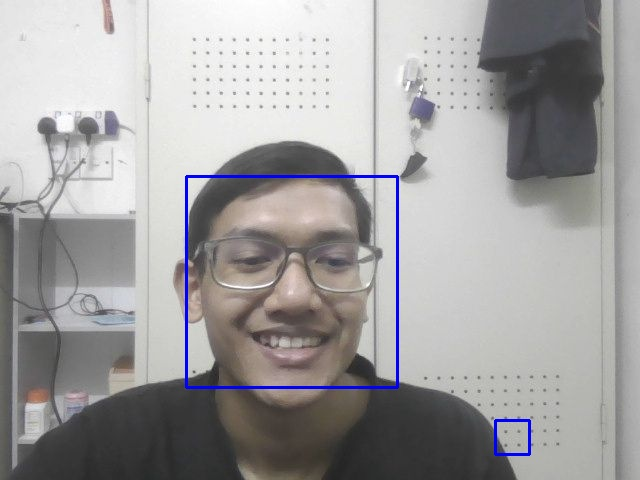

<IPython.core.display.Javascript object>

(480, 640)


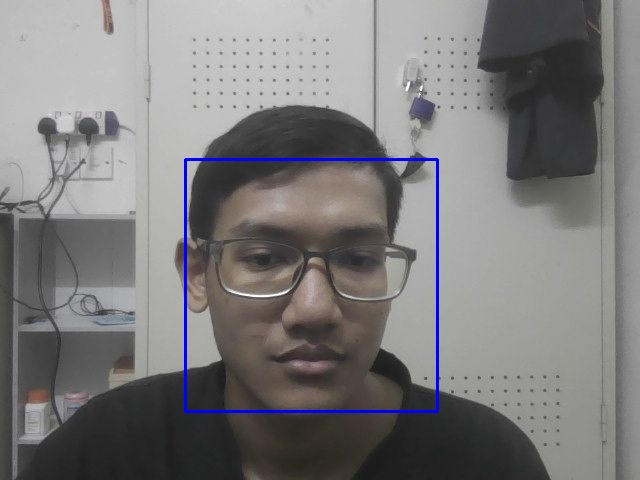

<IPython.core.display.Javascript object>

(480, 640)


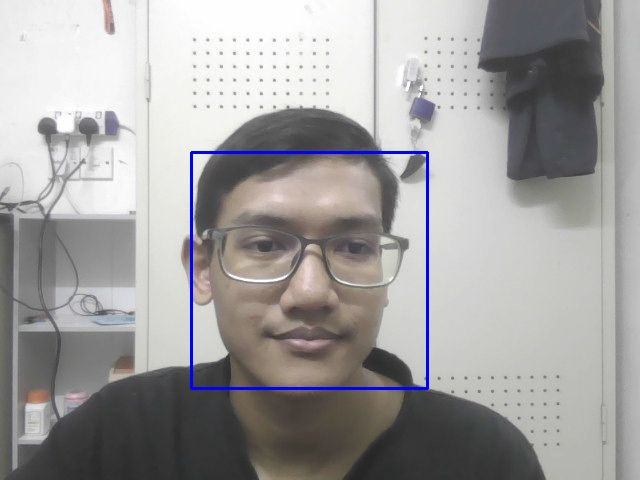

In [96]:
for i in range(3):
  try:
    filename = take_photo('photo3.jpg')
    #print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [ ]:

path = "/content/gdrive/MyDrive/PhotoAssignment/"

In [ ]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

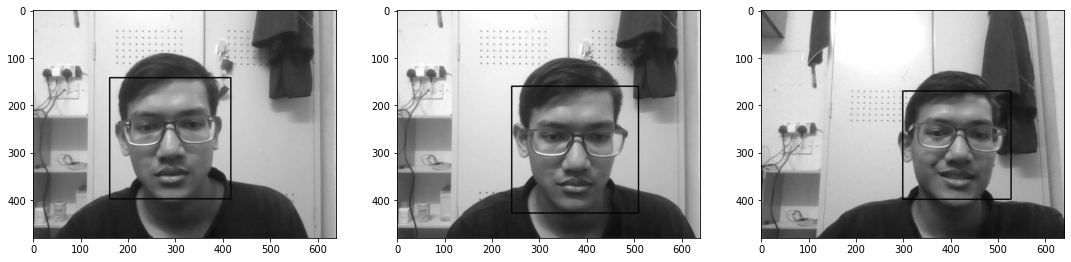

In [ ]:
image1 = cv2.imread(path + "photo1.jpg")
image2 = cv2.imread(path + "photo2.jpg")
image3 = cv2.imread(path + "photo3.jpg")


rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
rgb3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

blur1 = cv2.cvtColor(rgb1, cv2.COLOR_RGB2GRAY)
blur2 = cv2.cvtColor(rgb2, cv2.COLOR_RGB2GRAY)
blur3 = cv2.cvtColor(rgb3, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=[25,5])
plt.subplot(141);plt.imshow(blur1, cmap = "gray")
plt.subplot(142);plt.imshow(blur2, cmap = "gray")
plt.subplot(143);plt.imshow(blur3, cmap = "gray")


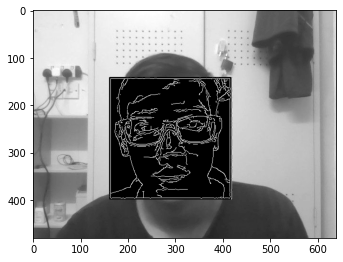

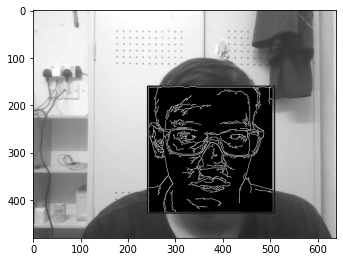

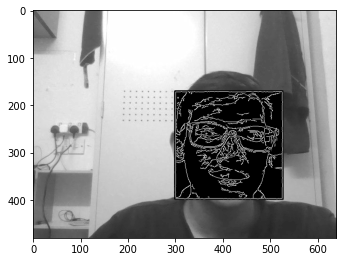

In [ ]:
faces1 = face_cascade.detectMultiScale(blur1)

  # draw face bounding box on image
for (x,y,w,h) in faces1:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      blur1[y : y+h, x: x+w] = cv2.Canny(blur1[y : y+h, x: x+w],30,90)

faces2 = face_cascade.detectMultiScale(blur2)

  # draw face bounding box on image
for (x,y,w,h) in faces2:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      blur2[y : y+h, x: x+w] = cv2.Canny(blur2[y : y+h, x: x+w],30,90)

faces3 = face_cascade.detectMultiScale(blur3)
  # draw face bounding box on image
for (x,y,w,h) in faces3:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      blur3[y : y+h, x: x+w] = cv2.Canny(blur3[y : y+h, x: x+w],30,90)

plt.figure(figsize=[25,5])
displayImage(blur1)
plt.figure(figsize=[25,5])
displayImage(blur2)
plt.figure(figsize=[25,5])
displayImage(blur3)


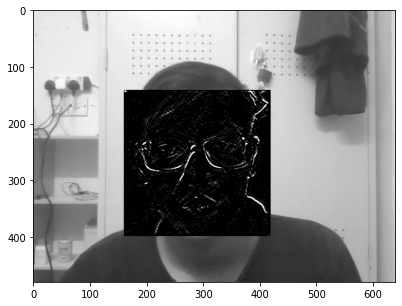

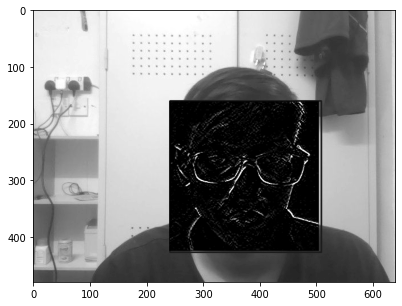

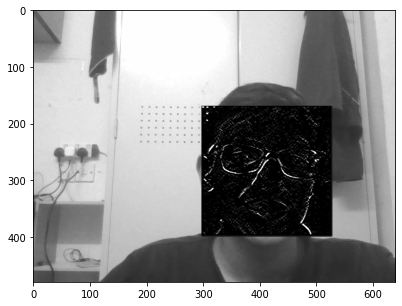

In [ ]:
blur1 = cv2.cvtColor(rgb1, cv2.COLOR_RGB2GRAY)
faces1 = face_cascade.detectMultiScale(blur1)
  # draw face bounding box on image
for (x,y,w,h) in faces1:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      #blur[y : y+h, x: x+w] = cv2.Canny(blur[y : y+h, x: x+w],30,90)
      blur1[y : y+h, x: x+w] = cv2.Sobel(blur1[y : y+h, x: x+w], cv2.CV_8U,1,0,ksize=3)
      blur1[y : y+h, x: x+w] = cv2.Sobel(blur1[y : y+h, x: x+w], cv2.CV_8U,0,1,ksize=3)
      imgSobel1 = blur1 


blur2 = cv2.cvtColor(rgb2, cv2.COLOR_RGB2GRAY)
faces2 = face_cascade.detectMultiScale(blur2)
  # draw face bounding box on image
for (x,y,w,h) in faces2:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      #blur[y : y+h, x: x+w] = cv2.Canny(blur[y : y+h, x: x+w],30,90)
      blur2[y : y+h, x: x+w] = cv2.Sobel(blur2[y : y+h, x: x+w], cv2.CV_8U,1,0,ksize=3)
      blur2[y : y+h, x: x+w] = cv2.Sobel(blur2[y : y+h, x: x+w], cv2.CV_8U,0,1,ksize=3)
      imgSobel2 = blur2 


blur3 = cv2.cvtColor(rgb3, cv2.COLOR_RGB2GRAY)
faces3 = face_cascade.detectMultiScale(blur3)
  # draw face bounding box on image
for (x,y,w,h) in faces3:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      #blur[y : y+h, x: x+w] = cv2.Canny(blur[y : y+h, x: x+w],30,90)
      blur3[y : y+h, x: x+w] = cv2.Sobel(blur3[y : y+h, x: x+w], cv2.CV_8U,1,0,ksize=3)
      blur3[y : y+h, x: x+w] = cv2.Sobel(blur3[y : y+h, x: x+w], cv2.CV_8U,0,1,ksize=3)
      imgSobel3 = blur3 


plt.figure(figsize=[25,5])
displayImage(imgSobel1)
plt.figure(figsize=[25,5])
displayImage(imgSobel2)
plt.figure(figsize=[25,5])
displayImage(imgSobel3)

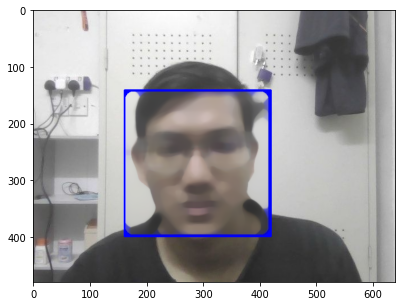

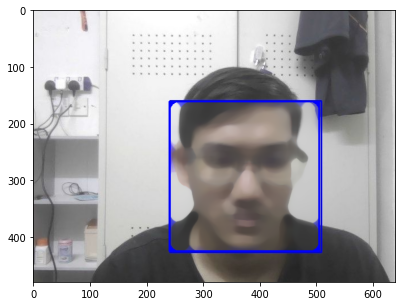

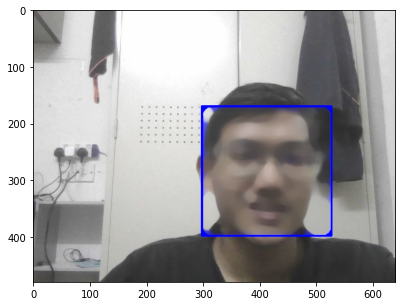

In [ ]:
img1 = cv2.imread(path+"photo1.jpg")
#color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


faces1 = face_cascade.detectMultiScale(img1)
  # draw face bounding box on image
for (x,y,w,h) in faces1:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      img1 = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      img1[y : y+h, x: x+w] = cv2.medianBlur(img1[y : y+h, x: x+w],19)


img2 = cv2.imread(path+"photo2.jpg")
faces2 = face_cascade.detectMultiScale(img2)
  # draw face bounding box on image
for (x,y,w,h) in faces2:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      img2[y : y+h, x: x+w] = cv2.medianBlur(img2[y : y+h, x: x+w],19)

img3 = cv2.imread(path+"photo3.jpg")
faces3 = face_cascade.detectMultiScale(img3)
  # draw face bounding box on image
for (x,y,w,h) in faces3:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      img3 = cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      img3[y : y+h, x: x+w] = cv2.medianBlur(img3[y : y+h, x: x+w],19)

plt.figure(figsize=[25,5])
displayImage(img1)
plt.figure(figsize=[25,5])
displayImage(img2)
plt.figure(figsize=[25,5])
displayImage(img3)     

Coins reading

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mount google drive to colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/PhotoAssignment/"

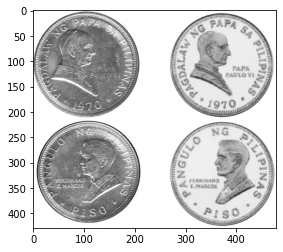

In [ ]:
image = cv2.imread(path + 'coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');


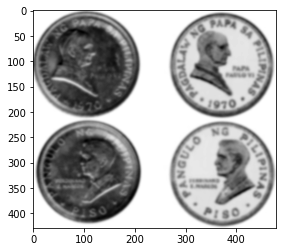

In [ ]:
blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap='gray')

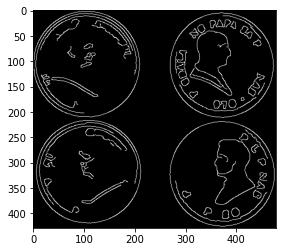

In [ ]:

canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

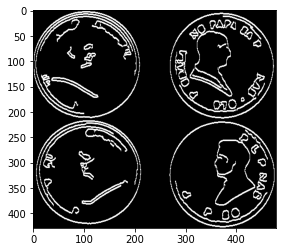

In [ ]:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap='gray')

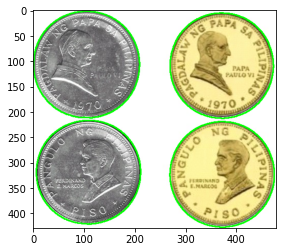

In [ ]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

plt.imshow(rgb)

In [ ]:
print('Coins in the image: ', len(cnt))
plt.show()


Coins in the image:  4
